Loading and Cleaning Data 

In [3]:
pip install ucimlrepo


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 MB 23.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 27.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 24.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 26.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.0/398.0 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 28.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.8 MB/s eta 0:0

In [4]:
pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo 
import pandas as pd

In [7]:
data_diabetes = fetch_ucirepo(id=296) 
   
X = data_diabetes.data.features 
y = data_diabetes.data.targets 
  
print(data_diabetes.metadata) 
print(data_diabetes.variables) 


{'uci_id': 296, 'name': 'Diabetes 130-US Hospitals for Years 1999-2008', 'repository_url': 'https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008', 'data_url': 'https://archive.ics.uci.edu/static/public/296/data.csv', 'abstract': 'The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge.\nThe problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide pro

/Users/evelynhaskins/.pyenv/versions/3.10.12/lib/python3.10/site-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [8]:
# Check for missing values in the dataset
missing_values = X.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide            

I removed all variables with missing values because, since this is a medical interview dataset, some questions appear to be optional, and I didn't want to deal with thousands of missing entries.

In [9]:
X_cleaned = X.dropna(axis=1)
print(f"Shape of the dataset before removing columns with missing values: {X.shape}")
print(f"Shape of the dataset after removing columns with missing values: {X_cleaned.shape}")
newmissing_values = X_cleaned.isnull().sum()
print("Missing values per column:")
print(newmissing_values)

Shape of the dataset before removing columns with missing values: (101766, 47)
Shape of the dataset after removing columns with missing values: (101766, 38)
Missing values per column:
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
number_diagnoses            0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolaza

I will remove the 'Yes' or 'No' columns from the dataset because there isn't a single 'Yes' value, so they are irrelevant. Additionally, I will remove the ID columns since they are just identifiers and shouldn't contribute to the prediction process.

In [10]:
X_cleaned = X_cleaned.drop(columns=["admission_type_id", "discharge_disposition_id", "admission_source_id"], errors="ignore")
X_cleaned = X_cleaned.select_dtypes(include=["number"])

print(X_cleaned.head())


   time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0                 1                  41               0                1   
1                 3                  59               0               18   
2                 2                  11               5               13   
3                 2                  44               1               16   
4                 1                  51               0                8   

   number_outpatient  number_emergency  number_inpatient  number_diagnoses  
0                  0                 0                 0                 1  
1                  0                 0                 0                 9  
2                  2                 0                 1                 6  
3                  0                 0                 0                 7  
4                  0                 0                 0                 5  


I need to select three input variables for creating a visually interpretable SVM model that we can visualize. To determine which variables are the most relevant for predicting readmission, I will first check the correlation between the features and the target variable, and then select the three features that show the strongest relationships.

Instead of relying solely on the correlation matrix, I wanted to use another model we covered in class. So, I created a Random Forest classifier to identify which features are most relevant for predicting the target variable.

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_cleaned, y)

feature_importances = pd.DataFrame({'Feature': X_cleaned.columns, 'Importance': rf.feature_importances_})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

print(feature_importances)


/Users/evelynhaskins/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              Feature  Importance
1  num_lab_procedures    0.408303
3     num_medications    0.244847
0    time_in_hospital    0.121306
7    number_diagnoses    0.062952
2      num_procedures    0.059331
6    number_inpatient    0.052570
4   number_outpatient    0.031023
5    number_emergency    0.019668


Next, I will select the top three features most strongly related to the target variable and use them in my SVM model.

In [12]:
top_3_features = feature_importances.head(3)
print(top_3_features)

              Feature  Importance
1  num_lab_procedures    0.408303
3     num_medications    0.244847
0    time_in_hospital    0.121306


Now we can move on to creating our Nonlinear SVM

In [13]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

Created a basic plot to visualize how the target variable is categorized based on the top three features......Cleary not a great start

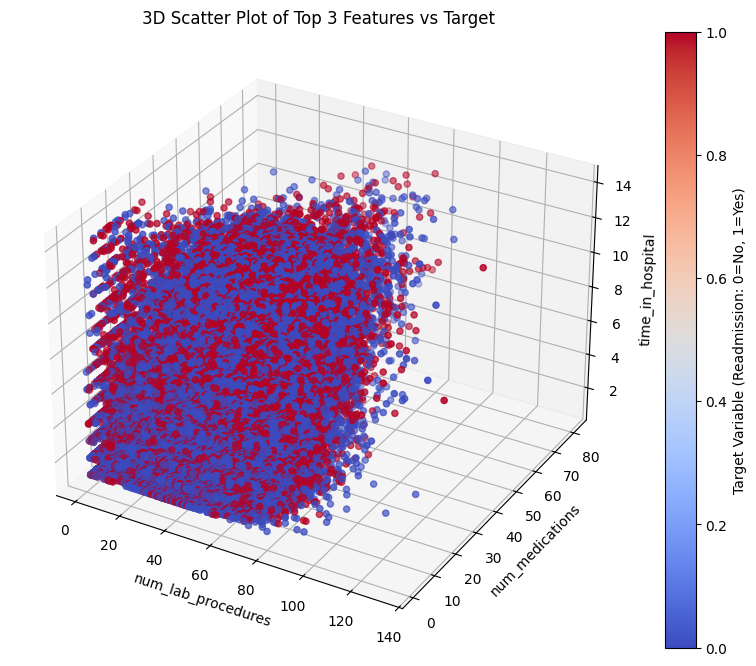

In [14]:
top_3_features = ['num_lab_procedures', 'num_medications', 'time_in_hospital']
X_top3 = X_cleaned[top_3_features]
y_target = y 

y_target_numeric = y_target['readmitted'].map({'NO': 0}).fillna(1)


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_top3['num_lab_procedures'], X_top3['num_medications'], X_top3['time_in_hospital'], c=y_target_numeric, cmap='coolwarm')

ax.set_xlabel('num_lab_procedures')
ax.set_ylabel('num_medications')
ax.set_zlabel('time_in_hospital')
ax.set_title('3D Scatter Plot of Top 3 Features vs Target')

colorbar = plt.colorbar(scatter, ax=ax)
colorbar.set_label('Target Variable (Readmission: 0=No, 1=Yes)')

plt.show()


Now try top 2 features... a little better 

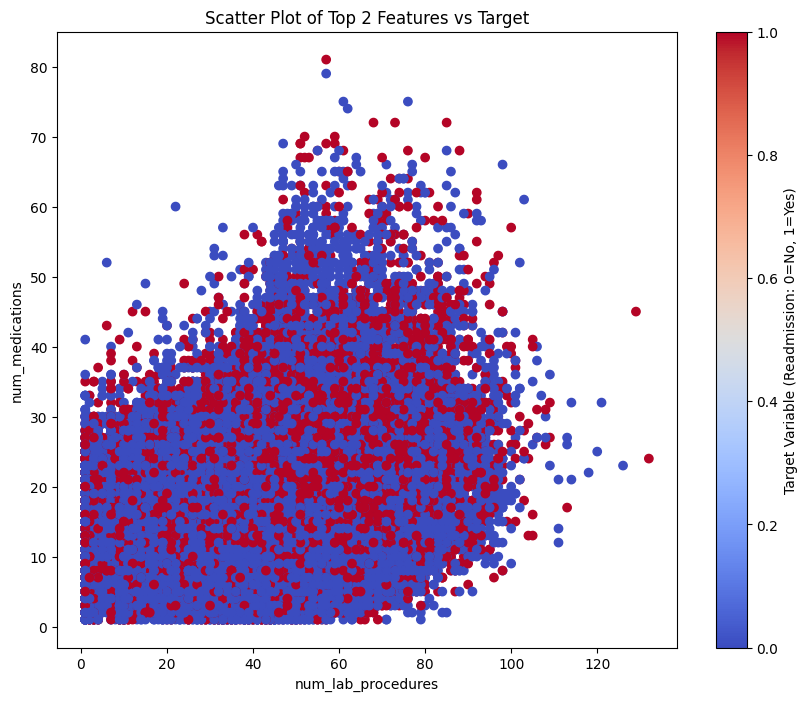

In [15]:
top_2_features = ['num_lab_procedures', 'num_medications']  
X_top2 = X_cleaned[top_2_features]  
y_target = y 

y_target_numeric = y_target['readmitted'].map({'NO': 0}).fillna(1)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

scatter = ax.scatter(X_top2['num_lab_procedures'], X_top2['num_medications'], c=y_target_numeric, cmap='coolwarm')

ax.set_xlabel('num_lab_procedures')
ax.set_ylabel('num_medications')
ax.set_title('Scatter Plot of Top 2 Features vs Target')

colorbar = plt.colorbar(scatter, ax=ax)
colorbar.set_label('Target Variable (Readmission: 0=No, 1=Yes)')

plt.show()


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

top_2_features = ['num_lab_procedures', 'num_medications']
X_top2 = X_cleaned[top_2_features]  
y_target = y  

y_target_numeric = y_target['readmitted'].map({'NO': 0}).fillna(1)

X_train, X_test, y_train, y_test = train_test_split(X_top2, y_target_numeric, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='rbf', random_state=42)

svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.5469
Classification Report:
              precision    recall  f1-score   support

         0.0       0.55      0.80      0.66     10952
         1.0       0.52      0.25      0.34      9402

    accuracy                           0.55     20354
   macro avg       0.54      0.53      0.50     20354
weighted avg       0.54      0.55      0.51     20354



Accuracy is clearly awful here so let's see if we can improve by tuning paramters 

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

param_grid = {
    'C': [1, 10], 
    'gamma': [0.1, 10],  
    'kernel': ['rbf']  
}

svm_model = SVC(random_state=42)

grid_search = GridSearchCV(svm_model, param_grid, cv=3, n_jobs=-1, verbose=1)

grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters: {'C': 1, 'gamma': 10, 'kernel': 'rbf'}
Accuracy: 0.5453
Classification Report:
              precision    recall  f1-score   support

         0.0       0.56      0.77      0.65     10952
         1.0       0.51      0.28      0.36      9402

    accuracy                           0.55     20354
   macro avg       0.54      0.53      0.50     20354
weighted avg       0.54      0.55      0.52     20354



Even Changing Parameters doesn't look better, let's try a different model 

Let's try logitic regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_reg_model = LogisticRegression(random_state=42)

log_reg_model.fit(X_train_scaled, y_train)

y_pred = log_reg_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.5330
Classification Report:
              precision    recall  f1-score   support

         0.0       0.54      0.93      0.68     10952
         1.0       0.47      0.08      0.13      9402

    accuracy                           0.53     20354
   macro avg       0.50      0.50      0.41     20354
weighted avg       0.51      0.53      0.43     20354



Okay...let's try random forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.5279
Classification Report:
              precision    recall  f1-score   support

         0.0       0.55      0.67      0.60     10952
         1.0       0.49      0.37      0.42      9402

    accuracy                           0.53     20354
   macro avg       0.52      0.52      0.51     20354
weighted avg       0.52      0.53      0.52     20354



What about KNN...

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))



Accuracy: 0.5186
Classification Report:
              precision    recall  f1-score   support

         0.0       0.55      0.58      0.56     10952
         1.0       0.48      0.45      0.46      9402

    accuracy                           0.52     20354
   macro avg       0.51      0.51      0.51     20354
weighted avg       0.52      0.52      0.52     20354



Just for my own sanity, last resort, nueral network

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

top_2_features = ['num_lab_procedures', 'num_medications']
X_top2 = X_cleaned[top_2_features]  
y_target = y 

y_target_numeric = y_target['readmitted'].map({'NO': 0}).fillna(1)

X_train, X_test, y_train, y_test = train_test_split(X_top2, y_target_numeric, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential()

model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")  # Convert probabilities to binary labels

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))


Epoch 1/10


/Users/evelynhaskins/.pyenv/versions/3.10.12/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2036/2036 ━━━━━━━━━━━━━━━━━━━━ 1s 329us/step - accuracy: 0.5433 - loss: 0.6860 - val_accuracy: 0.5444 - val_loss: 0.6864
Epoch 2/10
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 1s 296us/step - accuracy: 0.5459 - loss: 0.6861 - val_accuracy: 0.5500 - val_loss: 0.6853
Epoch 3/10
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 1s 300us/step - accuracy: 0.5489 - loss: 0.6848 - val_accuracy: 0.5503 - val_loss: 0.6850
Epoch 4/10
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 1s 298us/step - accuracy: 0.5474 - loss: 0.6851 - val_accuracy: 0.5476 - val_loss: 0.6859
Epoch 5/10
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 1s 302us/step - accuracy: 0.5490 - loss: 0.6845 - val_accuracy: 0.5505 - val_loss: 0.6858
Epoch 6/10
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 1s 304us/step - accuracy: 0.5479 - loss: 0.6848 - val_accuracy: 0.5517 - val_loss: 0.6851
Epoch 7/10
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 1s 321us/step - accuracy: 0.5452 - loss: 0.6852 - val_accuracy: 0.5491 - val_loss: 0.6850
Epoch 8/10
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 1s 306us/step - accuracy: 0.5461 - loss: 0.68

Safe to say this data is not correlated :(

**Conclusion:**

After applying various supervised learning models I’ve learned about throughout this course, I found that none of the models were able to achieve an accuracy score higher than 0.6. This was both a challenging and insightful experience, providing me with a deeper understanding of the complexities involved in machine learning and data science. I initially hoped to derive meaningful insights and predictive patterns from a dataset that, in hindsight, had very limited structure or patterns to work with. This exercise reinforced a critical lesson in data science: that the success of machine learning models heavily depends on the underlying patterns within the data.

Throughout my analysis, I tested a wide variety of models, including **Logistic Regression**, **Random Forest**, **Support Vector Machines (SVM)**, and **Neural Networks**, adjusting hyperparameters like regularization strength (C in SVM), kernel functions (for SVM), and activation functions (for neural networks). Despite optimizing these models with techniques like **GridSearchCV** and cross-validation, the accuracy remained consistently low, rarely surpassing 60%. The lack of improvement led me to realize that, at a fundamental level, models are only as good as the data they are trained on.

This experience has highlighted the crucial role of **feature selection** and **feature engineering**. I tried various combinations of the features, but even with this, the models couldn’t extract sufficient predictive value. **Standardization** and **scaling** helped, but they weren’t enough to compensate for the inherent limitations in the data itself. This aligns with the fundamental idea in machine learning that the best performance comes when models can "learn" from clearly defined patterns and relationships within the data, often captured through robust and meaningful features. If the data lacks these patterns—such as in cases of **high-dimensionality** with little inherent structure—the model's performance will be capped regardless of the algorithms used.

This challenge also brought to light some important concepts about **overfitting** and **underfitting**. While it’s tempting to keep adjusting models in hopes of improving performance, it became clear that the data simply wasn’t conducive to finding a better fit. In trying to tune hyperparameters like **regularization parameters** or the **depth of decision trees**, I reached a point where increasing model complexity only resulted in **overfitting** to noise in the data. The performance on the training set was better than on the testing set, but I did not achieve meaningful improvement overall.

A particularly valuable realization came from considering the study that generated this dataset. It seems likely that the authors of the original research may have drawn conclusions that were not fully supported by the available data. In real-world scenarios, data scientists and researchers often work with imperfect data, and this process helped me understand how easy it is to overlook the limitations of data quality when making conclusions. A dataset with weak or no patterns can lead to inaccurate conclusions if it’s not analyzed critically, which is a key takeaway for me moving forward in my career.

Despite the relatively low accuracy, I am not disappointed. This was a great exercise in understanding the relationship between data quality and model performance. I now have a more realistic understanding of how machine learning models behave when faced with unstructured or poorly defined data, and how critical it is to assess the data before jumping into model building. In the future, I will focus on ensuring that the data has clear patterns or that appropriate preprocessing steps, like feature engineering or dimensionality reduction, are taken to improve the model’s predictive power.

Ultimately, this exercise was a reminder that **data science** is as much about understanding the data as it is about applying algorithms. Without strong underlying patterns, even the most sophisticated algorithms and tuning strategies will struggle. It was a humbling experience, but it gave me practical insights that will guide me in approaching future projects with a better understanding of the data science process, including how to set expectations and interpret results realistically.